In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [ ]:
df = pd.read_csv("updated_data.csv")


In [ ]:
df = df.sample(frac=0.5, random_state=42)

df = df.dropna()

X = df[['Cinsiyet', 'Yas', 'Bolge', 'Egitim', 'soru1', 'soru2', 'soru3', 'soru4', 'soru5', 'soru6', 'soru7', 'soru8', 'soru9', 'soru10']]
y = df['parti']

label_encoder = LabelEncoder()
X_encoded = X.apply(label_encoder.fit_transform)

X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

model = RandomForestClassifier()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Model Accuracy:", accuracy)

Model Accuracy: 0.42696629213483145


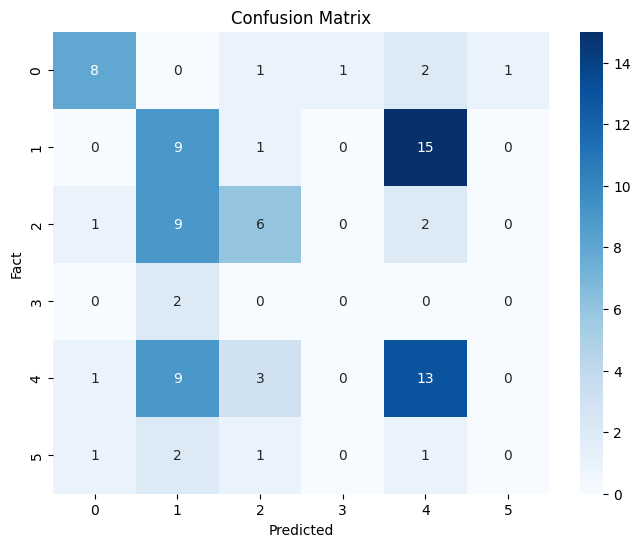

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

y_pred = model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Fact')
plt.title('Confusion Matrix')
plt.show()

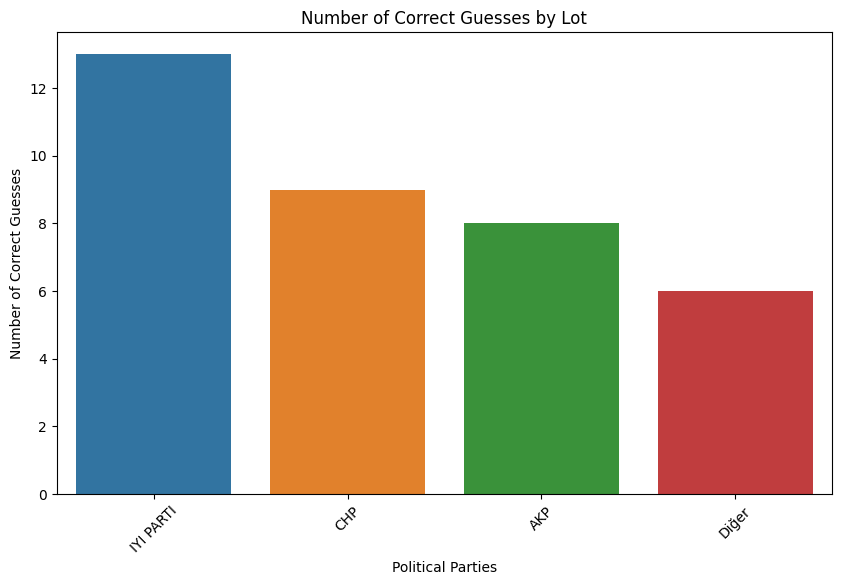

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
results = pd.DataFrame({'y_test': y_test, 'y_pred': y_pred})

correct_predictions = results[results['y_test'] == results['y_pred']]
party_counts = correct_predictions['y_test'].value_counts()

plt.figure(figsize=(10, 6))
sns.barplot(x=party_counts.index, y=party_counts.values)
plt.xlabel('Political Parties')
plt.ylabel('Number of Correct Guesses')
plt.title('Number of Correct Guesses by Lot')
plt.xticks(rotation=45)
plt.show()